In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [2]:
import pandas as pd

data = pd.DataFrame(X)
data.insert(784, "label", y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [3]:
X_train[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

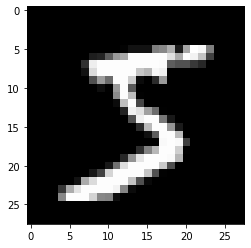

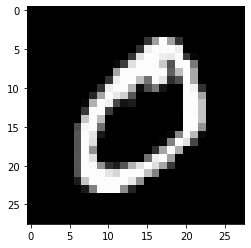

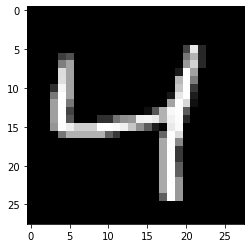

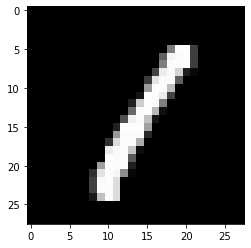

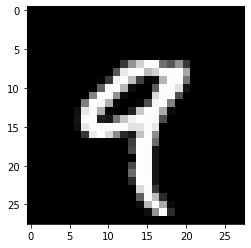

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap='gray')
  plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

In [6]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

c:\Users\sadet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [7]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['2', '4', '1', ..., '7', '0', '1'], dtype='<U1')

In [8]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

In [9]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

Actual Value: 0
Predicted Value: 0


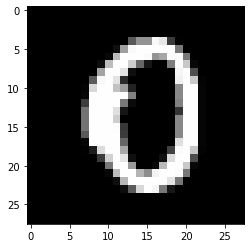

In [10]:
print(f"Actual Value: {y_test[0]}")
print(f"Predicted Value: {predictions_NN2[0]}")


plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.show()

Actual Value: 4
Predicted Value For 1 Hidden Layer: 4
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


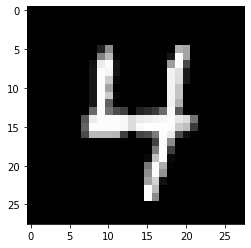

In [11]:
print(f"Actual Value: {y_test[1]}")
print(f"Predicted Value For 1 Hidden Layer: {predictions_NN[1]}")
print(f"Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}")
print(f"Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}")


plt.imshow(X_test[1].reshape((28, 28)), cmap='gray')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)

array([[1565,   16,  173,  210,    5,    0,   41,    1,   66,    0],
       [   8, 2219,    0,   13,   57,    0,   65,    2,   20,    1],
       [1256,  112,  134,  273,   22,    0,  115,   20,  175,    8],
       [ 914,  164,  177,  429,   36,    0,  116,   17,  256,    8],
       [   6,  167,    0,    5,  669,    0,   13,  731,   12,  401],
       [ 348,  171,  191,  542,   20,    0,  191,   22,  412,    3],
       [  90,  857,   38,  163,   76,    0,  507,    5,  296,   13],
       [   2,  101,    1,    3,  294,    0,   15, 1615,    3,  155],
       [  94,  540,   68,  312,   60,    0,  442,   10,  511,    5],
       [  11,  101,    2,    9,  362,    0,   11, 1278,   10,  342]],
      dtype=int64)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_NN))

              precision    recall  f1-score   support

           0       0.36      0.75      0.49      2077
           1       0.50      0.93      0.65      2385
           2       0.17      0.06      0.09      2115
           3       0.22      0.20      0.21      2117
           4       0.42      0.33      0.37      2004
           5       0.00      0.00      0.00      1900
           6       0.33      0.25      0.28      2045
           7       0.44      0.74      0.55      2189
           8       0.29      0.25      0.27      2042
           9       0.37      0.16      0.22      2126

    accuracy                           0.38     21000
   macro avg       0.31      0.37      0.31     21000
weighted avg       0.32      0.38      0.32     21000



c:\Users\sadet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sadet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sadet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [14]:
confusion_matrix(y_test, predictions_NN1)

array([[2048,    0,    3,    1,    3,    5,   11,    0,    4,    2],
       [   0, 2360,    9,    3,    3,    0,    2,    4,    3,    1],
       [   4,    5, 2058,   11,    8,    2,    2,    8,   14,    3],
       [   3,    2,   24, 2032,    2,   20,    2,   11,   15,    6],
       [   1,    3,    3,    2, 1961,    1,    9,    6,    3,   15],
       [   5,    1,    5,   12,    7, 1837,   12,    3,   12,    6],
       [   6,    3,    2,    2,   12,   11, 2000,    1,    8,    0],
       [   1,    6,   12,    1,    8,    3,    0, 2144,    3,   11],
       [   4,   17,    5,    9,    6,   11,    7,    1, 1975,    7],
       [   2,    3,    2,   14,   45,    9,    1,   17,    9, 2024]],
      dtype=int64)

In [15]:
print(classification_report(y_test,predictions_NN1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.98      0.99      0.99      2385
           2       0.97      0.97      0.97      2115
           3       0.97      0.96      0.97      2117
           4       0.95      0.98      0.97      2004
           5       0.97      0.97      0.97      1900
           6       0.98      0.98      0.98      2045
           7       0.98      0.98      0.98      2189
           8       0.97      0.97      0.97      2042
           9       0.98      0.95      0.96      2126

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [16]:
confusion_matrix(y_test, predictions_NN2)

array([[2057,    0,    1,    1,    2,    4,    9,    1,    1,    1],
       [   1, 2360,    8,    4,    2,    0,    2,    4,    1,    3],
       [   2,    3, 2083,    5,    3,    0,    2,    8,    7,    2],
       [   0,    2,   13, 2062,    0,   13,    2,    7,   13,    5],
       [   1,    1,    3,    2, 1971,    1,    5,    4,    2,   14],
       [   2,    0,    4,   10,    4, 1855,   11,    1,    7,    6],
       [   4,    3,    2,    0,   10,    7, 2013,    2,    4,    0],
       [   2,    6,    9,    1,    8,    3,    0, 2142,    3,   15],
       [   4,   12,    5,   10,    4,    5,    6,    1, 1985,   10],
       [   3,    1,    0,    6,   23,    6,    2,   15,    4, 2066]],
      dtype=int64)

In [17]:
print(classification_report(y_test,predictions_NN2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.98      0.98      0.98      2115
           3       0.98      0.97      0.98      2117
           4       0.97      0.98      0.98      2004
           5       0.98      0.98      0.98      1900
           6       0.98      0.98      0.98      2045
           7       0.98      0.98      0.98      2189
           8       0.98      0.97      0.98      2042
           9       0.97      0.97      0.97      2126

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



Neural networks have an input layer that takes input data and sends it to the hidden layers. There can be one or more hidden layers communicating with each other. They send the information to the output layer” awhich then calculates the output.

The activation function is a nonlinear function which allows the model to transform the input, which is linear until now. It works like a threshold and determines the output between the desired range and there are different activation functions that can be used.

Each neuron or perceptron has an initial value that will be added to the multiplication of weights and the bias. The weight indicates the strength of the connection for each input, it decides how much influence the input will have on the output. The bias is similar to the intercept in linear regression.

In neural networks, the process of passing information forward through each layer is called “forward propagation”.  It starts with the input layer which receives the input data and directs it to the hidden layer. Each neuron or perceptron has an initial value that will be added to the multiplication of weights and the bias. This value then transits through the activation function which allows the model to transform the input and determines whether it will pass the perceptrons value to the next layer. With this approach, the data is transferred through the network until it reaches the neurons of the output layer.

After training the model, which is called forward propagation, to adjust the weights, biases and minimize the error we can use backpropagation. This means we go backwards and do the crosscheck to adjust the weights, biases to minimize the error.